In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('hcvdat0.csv')
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [7]:
print("Statistik Deskriptif : ")
df.describe()

Statistik Deskriptif : 


,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


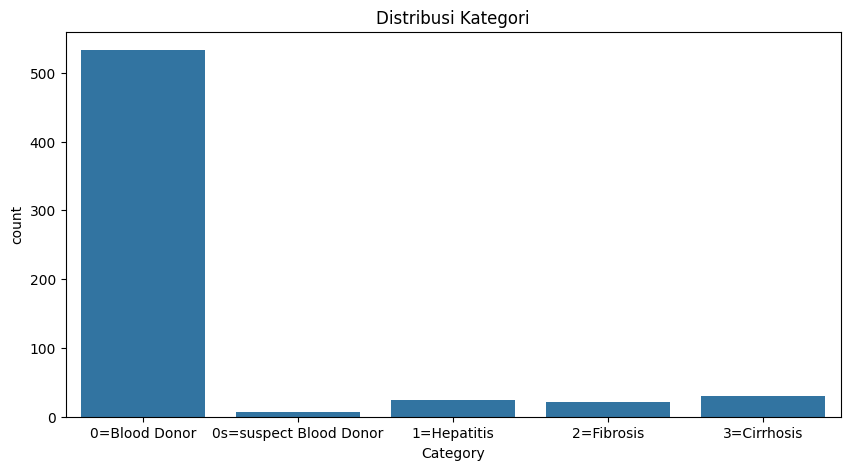

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(x="Category",data=df)
plt.title("Distribusi Kategori")
plt.show()

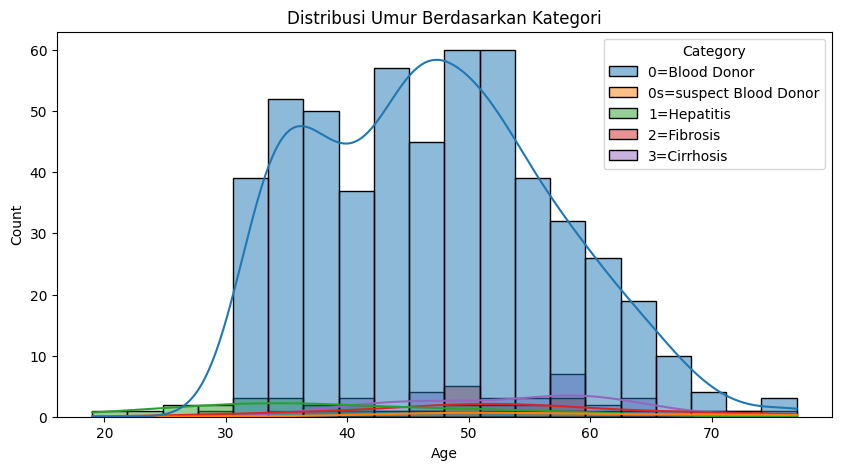

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='Age',hue='Category',kde=True,bins=20)
plt.title('Distribusi Umur Berdasarkan Kategori')
plt.show()

In [10]:
label_counts = df['Category'].value_counts()
print(label_counts)

Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64


In [11]:
nan_info = df.isnull().sum()
nan_columns = nan_info[nan_info > 0 ]

print("Fitur dengan nilai NaN")
print(nan_columns)

Fitur dengan nilai NaN
ALB      1
ALP     18
ALT      1
CHOL    10
PROT     1
dtype: int64


In [21]:
pd.set_option('future.no_silent_downcasting', True)

df.dropna(inplace=True)
df['Sex'] = df["Sex"].replace(['m','f'],[0,1])
df.to_csv('data_cleaned.csv',index=False)
cleaned_df = pd.read_csv('data_cleaned.csv')
cleaned_df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,609,3=Cirrhosis,58,1,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
585,610,3=Cirrhosis,59,1,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
586,611,3=Cirrhosis,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
587,612,3=Cirrhosis,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle as pkl

X = cleaned_df.drop(columns=["Category"])
y = cleaned_df['Category']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.2)

binary_columns = ['Sex']
scaler = StandardScaler()
non_binary_columns = [col for col in X_train.columns if col not in binary_columns]
scaler.fit(X_train[non_binary_columns])

pkl.dump(scaler,open('scaler.pkl','wb'))
X_train_scaled=X_train.copy()
X_train_scaled[non_binary_columns] = scaler.transform(X_train[non_binary_columns])

normalized_data = pd.DataFrame(X_train_scaled,columns=X.columns)
normalized_data.to_csv('normalized_data.csv',index=False)
normalized_data_train = pd.read_csv('normalized_data.csv')
normalized_data_train

,Unnamed: 0,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,-1.341643,-1.078006,0,0.359748,0.145468,1.196471,0.272916,0.144231,0.002844,-0.443225,-0.222487,0.920313,0.662574
1,-1.504569,-1.280899,0,0.517924,0.050849,-0.031716,-0.258231,-0.320879,0.898895,-0.612767,0.023108,-0.325948,-0.896521
2,-0.480463,0.443695,0,0.113697,0.122759,1.025890,-0.298210,-0.133766,1.717227,0.814951,0.309635,0.379929,0.214334
3,0.968413,0.443695,1,0.693675,0.349845,-0.080453,-0.183985,-0.342263,0.226857,0.591870,-0.324818,-0.197607,-0.253394
4,0.747299,0.037908,1,-0.413555,-0.679609,-0.562955,-0.449559,-0.187227,0.464585,1.145111,-0.222487,-0.401939,-0.019530
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,-0.975060,-0.367879,0,0.517924,0.932697,0.031643,-0.246809,-0.304841,-0.166309,-0.701999,0.555230,-0.393496,0.974393
467,-0.887778,-0.266432,0,0.482774,0.096266,-0.533713,-0.509527,-0.203265,-0.070303,-0.023833,0.043574,-0.341146,-0.097485
468,-1.312549,-0.976559,0,0.693675,-0.709887,-0.514218,-0.323911,-0.010806,0.263430,0.449098,0.452899,-0.442468,0.837972
469,-0.358269,0.646588,0,0.939726,0.217378,0.455660,0.527067,-0.267418,0.313719,-0.157682,0.104973,-0.114860,1.461610


In [14]:
import sklearn
import imblearn
print(sklearn.__version__)
print(imblearn.__version__)


1.5.2
0.12.4


In [17]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=1)
X_resampled,y_resampled = ros.fit_resample(X_train_scaled,y_train)

resempled_data = pd.DataFrame(X_resampled,columns=X.columns)
resempled_data["Category"] = y_resampled
resempled_data.to_csv("balanced_data_train.csv",index=False)

balanced_data_train = pd.read_csv("balanced_data_train.csv")
balanced_data_train

,Unnamed: 0,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,-1.341643,-1.078006,0,0.359748,0.145468,1.196471,0.272916,0.144231,0.002844,-0.443225,-0.222487,0.920313,0.662574,0=Blood Donor
1,-1.504569,-1.280899,0,0.517924,0.050849,-0.031716,-0.258231,-0.320879,0.898895,-0.612767,0.023108,-0.325948,-0.896521,0=Blood Donor
2,-0.480463,0.443695,0,0.113697,0.122759,1.025890,-0.298210,-0.133766,1.717227,0.814951,0.309635,0.379929,0.214334,0=Blood Donor
3,0.968413,0.443695,1,0.693675,0.349845,-0.080453,-0.183985,-0.342263,0.226857,0.591870,-0.324818,-0.197607,-0.253394,0=Blood Donor
4,0.747299,0.037908,1,-0.413555,-0.679609,-0.562955,-0.449559,-0.187227,0.464585,1.145111,-0.222487,-0.401939,-0.019530,0=Blood Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,1.748130,1.052375,0,-1.854712,2.806151,-0.967477,4.216542,2.507204,-2.223569,-1.299856,-0.296165,3.946463,1.227746,3=Cirrhosis
2126,1.829593,1.661055,1,-2.206213,0.694258,-1.138058,1.852080,1.972594,-2.968754,-1.558630,-0.290025,0.408637,1.987805,3=Cirrhosis
2127,1.742311,0.849481,0,-2.030463,-1.080793,-1.264776,1.318077,5.768320,-2.868177,-3.521742,-0.032151,-0.378298,-3.430051,3=Cirrhosis
2128,1.730673,0.849481,0,-2.557715,0.459603,-0.480101,8.157313,1.384524,-3.078474,-1.638939,-0.285932,0.906803,-1.266806,3=Cirrhosis


In [18]:
import pickle

with open('scaler.pkl','rb') as standarisasi:
    loadscal = pickle.load(standarisasi)
    
X_test_scaled = X_test.copy()
X_test_scaled[non_binary_columns] = loadscal.transform(X_test[non_binary_columns])

normalized_data_test = pd.DataFrame(X_test_scaled,columns=X.columns)

normalized_data_test.to_csv('normalized_data_test.csv',index=False)
normal_data_test = pd.read_csv('normalized_data_test.csv')
normal_data_test

,Unnamed: 0,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1.259352,1.255268,1,-0.185079,0.645056,-0.041463,-0.186841,-0.288802,0.203998,-0.425379,-0.468081,-0.336080,-0.019530
1,1.637573,0.950928,1,0.254298,-0.637976,-0.904118,0.047321,0.368767,0.208570,0.725719,-0.193834,-0.204361,1.987805
2,-1.597669,-1.382346,0,0.324598,-0.865062,3.457894,0.344307,0.010579,-0.074875,-1.567553,-0.202020,-0.079398,-0.428793
3,1.561929,-0.164985,0,0.605799,-1.591735,-0.182802,2.594544,0.315306,-0.541187,-1.219547,-0.416916,0.543733,0.233823
4,-1.207811,-0.875112,0,0.746400,-0.244362,-0.299772,-0.323911,1.838942,0.208570,-0.532458,-0.079223,-0.407005,0.721040
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,-1.254361,-0.875112,0,0.957301,-0.092972,-0.099948,-0.144006,-0.032190,0.862321,0.788181,-0.161088,0.165464,1.286212
114,0.997507,0.443695,1,1.748179,0.486096,-0.026842,-0.386735,-0.176535,-0.646336,0.466945,0.145905,-0.400251,2.026782
115,1.020782,0.545141,1,0.148847,-0.528219,-0.290025,0.235793,-0.181881,-0.710340,-0.996466,-0.283885,-0.435713,-0.175440
116,0.235247,-1.382346,1,-0.940808,0.073558,-0.611693,-0.358179,-0.395724,0.761744,0.190324,-0.324818,-0.212805,0.487176


In [19]:
X_train_scaled.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC(kernel='linear',C=1.0,random_state=42,class_weight='balanced')
svm_model.fit(X_train_scaled,y_train)

svm_model_file_path = 'svm_model.pkl'
with open(svm_model_file_path,'wb') as svm_model_file:
    pickle.dump(svm_model,svm_model_file)

with open(svm_model_file_path,'rb') as svm_model_file:
    loaded_svm_model = pickle.load(svm_model_file)
    
y_pred_svm = loaded_svm_model.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test,y_pred_svm)
print("Akurasi SVM : ",svm_accuracy)

Akurasi SVM :  0.9152542372881356


## UTS
- Tulis dan 
- demo menggunakan metode terserah (SVM)
- dataset harus beda2 
- preprocessing apa saja
- extrasi fitur jika ada
- metode untuk pemodelan
- bisa menjelaskan
